/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_27295/3339954518.py:52: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=row['text'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=fontsize)
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_27295/3339954518.py:52: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=row['text'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=fontsize)
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_27295/3339954518.py:52: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=row['text'

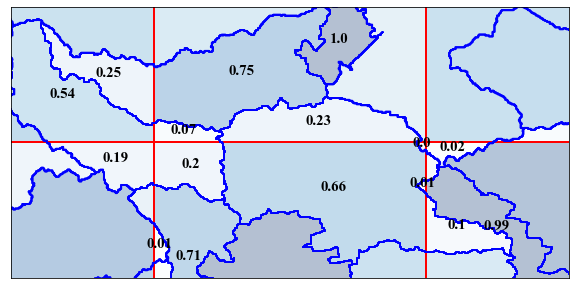

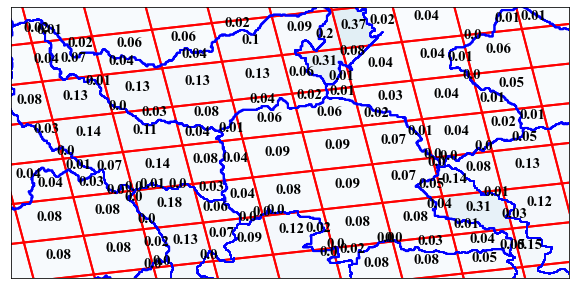

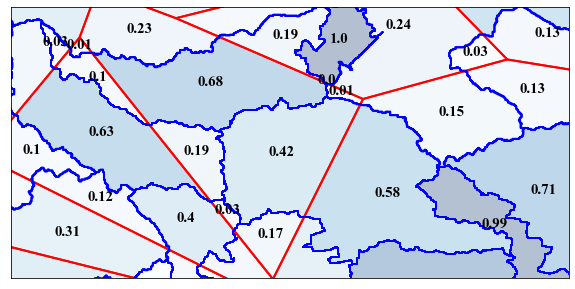

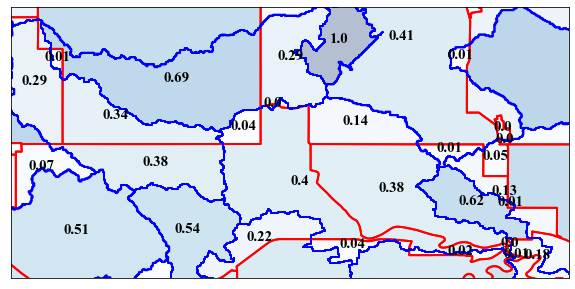

In [73]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib          as      mpl
font = {'family' :  'Times New Roman',
        'weight' :  'bold',
        'size'   :  40}
mpl.rc('font', **font)

def figure_making(shp_name,
                  figure_name = './fig/',
                  figsize = (10,5),
                  cmap = 'Blues',
                  fontsize = 15,
                  alpha = 1.0,
                  min_lat = 49.75,
                  min_lon = -113.5,
                  max_lat = 50.00,
                  max_lon = -113.00,
                  margin_text = 0.01):


    shp = gpd.read_file(shp_name)
    #
    fig, ax = plt.subplots(figsize=figsize)
    fig.set_facecolor("white")
    
    #
    shp ['text'] = shp ['AP1N'].round(2).astype(str)
    shp.plot(column='AP1N', ax=ax, cmap = cmap, alpha = alpha)
    #
    shp_d_IDs = shp.dissolve(by='S_2_ID_s')
    shp_d_IDt = shp.dissolve(by='S_1_ID_t')

    # 
    shp_d_IDs.geometry.boundary.plot(color=None,edgecolor='r',linewidth = 2, ax = ax)
    shp_d_IDt.geometry.boundary.plot(color=None,edgecolor='b',linewidth = 2, ax = ax)

    #
    ax.set_xticks([])
    ax.set_yticks([])

    ax.axis('equal')

    ax.set_ylim(min_lat,max_lat)
    ax.set_xlim(min_lon,max_lon)

    for index, row in shp.iterrows():
        if (row['geometry'].centroid.x < max_lon - margin_text) and \
           (row['geometry'].centroid.x > min_lon + margin_text) and \
           (row['geometry'].centroid.y < max_lat - margin_text) and \
           (row['geometry'].centroid.y > min_lat + margin_text):
            ax.annotate(s=row['text'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=fontsize)
        
    #
    plt.savefig(figure_name, bbox_inches='tight',dpi=400)

    
figure_making('./temporary/ERA5_Medicine_Hat_intersected_shapefile.shp','./fig/ERA5_remapping.png',alpha=0.3)
figure_making('./temporary/WRF_Medicine_Hat_intersected_shapefile.shp','./fig/WRF_remapping.png' ,alpha=0.3)
figure_making('./temporary/SCDNA_Medicine_Hat_prcp_intersected_shapefile.shp','./fig/SCDNA_remapping.png' ,alpha=0.3)
figure_making('./temporary/Dessimination_Area_intersected_shapefile.shp','./fig/DA_remapping.png' ,alpha=0.3)


In [76]:
# merge the two figures into one
from PIL import Image, ImageFont, ImageDraw

image_list = ['fig/ERA5_remapping.png','fig/WRF_remapping.png']
if image_list:
    images = [Image.open(x) for x in image_list]
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)
    new_im = Image.new('RGB', (total_width, max_height))
    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset,0))
        x_offset += im.size[0]
    new_im.save('./fig/ERA5_WRF_remapping.png')
    
image_list = ['fig/SCDNA_remapping.png','fig/DA_remapping.png']
if image_list:
    images = [Image.open(x) for x in image_list]
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)
    new_im = Image.new('RGB', (total_width, max_height))
    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset,0))
        x_offset += im.size[0]
    new_im.save('./fig/SCDNA_DA_remapping.png')

image_list = ['fig/ERA5_WRF_remapping.png','fig/SCDNA_DA_remapping.png']
if image_list:
    images = [Image.open(x) for x in image_list]
    widths, heights = zip(*(i.size for i in images))
    max_width = max(widths)
    total_height = sum(heights)
    new_im = Image.new('RGB', (max_width, total_height))
    y_offset = 0
    for im in images:
        new_im.paste(im, (0,y_offset))
        y_offset += im.size[1]
    new_im.save('./fig/ERA5_WRF_SCDNA_DA_remapping.png')